Catalog is : ./catalog/


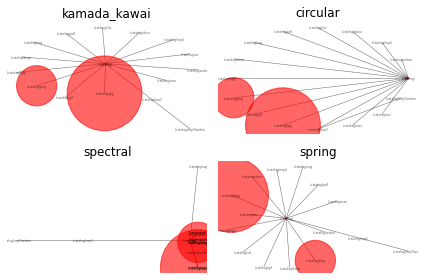

In [22]:
# Лабораторная работа №5
# Вариант 12 (3)
# Цвет вершины зависит от типа файла

import networkx as nx
import matplotlib.pyplot as plt
import os
import matplotlib
import re

# Get required paths
catalogPath = "./catalog/"

# Placeholders
files = []
sizes = [1] # default root node size

print('Catalog is :', catalogPath)

# Get files from subdirectory
def find_files(path):
    return [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Define node size
def define_sizes(files, path):
    for file in files:
        extension = os.path.splitext(file)[1]
        sizes.append(os.stat(path + '/' + file).st_size / 500)

def get_tree(tree=[catalogPath, ], G=nx.Graph(), itr=0, max_itr=900):
    point = tree.pop(0)
    itr = itr + 1
    sub_tree = [os.path.join(point, x) for x in os.listdir(point) if
                os.path.isdir(os.path.join(point, x)) and not is_hidden_dir(os.path.join(point, x))]

    define_sizes(find_files(point), point)
    
    if sub_tree:
        tree.extend(sub_tree)
        G.add_edges_from(map(lambda b: (point, b), sub_tree), lablel=sub_tree)

    if tree and itr <= max_itr:
        return get_tree(tree, G, itr)
    else:
        return G


def is_hidden_dir(d):
    import sys, subprocess
    if sys.platform.startswith("win"):
        p = subprocess.check_output(["attrib", d])
        return True if b'H' in p[:12] else False
    else:
        return True if os.path.basename(d)[0] == '.' else False


def main():
    G = get_tree()
    options = {
        'node_color': 'red',
        'node_size': sizes,
        'width': 0.5,
        'with_labels': True,
        'alpha': 0.6,
        'font_size': 3,
        'font_family': 'Arial'
    }
    
    plt.subplot(221)
    plt.title('kamada_kawai')
    nx.draw_kamada_kawai(G, **options)

    plt.subplot(222)
    plt.title('circular')
    nx.draw_circular(G, **options)

    plt.subplot(223)
    plt.title('spectral')
    nx.draw_spectral(G, **options)

    plt.subplot(224)
    plt.title('spring')
    nx.draw_spring(G, **options)

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()